# Vizualizace fraktálů #

Import knihoven:

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
from numba import jit

Definice fraktálových funkcí:

In [130]:
@jit(nopython=True)
def mandelbrot(c, max_iter):
    z = 0
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter

@jit(nopython=True)
def julia(z, c, max_iter):
    for n in range(max_iter):
        if abs(z) > 2:
            return n
        z = z*z + c
    return max_iter

Generování fraktálových dat:

In [131]:
def generate_fractal(xmin, xmax, ymin, ymax, width, height, max_iter, fractal_func, c=None):
    r1 = np.linspace(xmin, xmax, width) #rozshah x
    r2 = np.linspace(ymin, ymax, height) #rozsah y
    n3 = np.empty((width, height)) #prazdna matice (pro vysledne fraktalove hodnoty)

    for i in range(width):
        for j in range(height):
            if fractal_func == mandelbrot:
                n3[i, j] = fractal_func(r1[i] + 1j * r2[j], max_iter)
            else: #julia
                n3[i, j] = fractal_func(r1[i] + 1j * r2[j], c, max_iter)
    return (r1, r2, n3)

Vykreslení fraktálu:

In [132]:
def plot_fractal(ax, data, colormap='inferno'):
    r1, r2, n3 = data
    ax.imshow(n3.T, cmap=colormap, extent=(r1.min(), r1.max(), r2.min(), r2.max()))
    ax.set_aspect('auto')
    ax.figure.canvas.draw_idle()

Parametry:

In [133]:
xmin, xmax, ymin, ymax = -2.0, 2.0, -2.0, 2.0
width, height = 800, 800
max_iter = 256
c_julia = complex(-0.7, 0.27015)  # parametr pro Juliovu množinu

Interaktivní vizulace Mandelbrotovy množiny:

Updated Mandelbrot set with max_iter=256, zoom=1, colormap=inferno


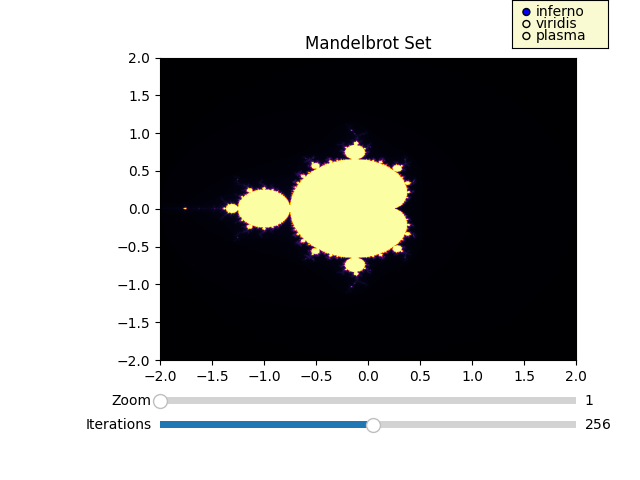

In [134]:
def interactive_mandelbrot():
    fig, ax = plt.subplots()
    plt.subplots_adjust(left=0.25, bottom=0.25)
    axcolor = 'lightgoldenrodyellow'

    ax_iter = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
    ax_zoom = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)
    ax_colormap = plt.axes([0.8, 0.9, 0.15, 0.1], facecolor=axcolor)

    s_iter = Slider(ax_iter, 'Iterace', 0, 500, valinit=max_iter, valstep=1)
    s_zoom = Slider(ax_zoom, 'Přiblížení', 1, 10, valinit=1, valstep=0.1)

    colormap_options = ['inferno', 'magma', 'plasma']
    r_colormap = RadioButtons(ax_colormap, colormap_options)

    def update(val):
        max_iter = int(s_iter.val)
        zoom = s_zoom.val
        colormap = r_colormap.value_selected
        
        xmin, xmax = -2.0 / zoom, 2.0 / zoom
        ymin, ymax = -2.0 / zoom, 2.0 / zoom
        
        fractal_data = generate_fractal(xmin, xmax, ymin, ymax, width, height, max_iter, mandelbrot)
        ax.clear()
        plot_fractal(ax, fractal_data, colormap)
        ax.set_title('Mandelbrotova množina')
        print(f"Iterace={max_iter}, Přiblížení={zoom}, Barva={colormap}")

    s_iter.on_changed(update)
    s_zoom.on_changed(update)
    r_colormap.on_clicked(update)

    update(None)
    plt.show()

#SPUŠTĚNÍ
interactive_mandelbrot()

Interaktivní vizualizace Juliovy množiny:

Iterace=256, Přiblížení=1, C=-0.7, Barva=inferno


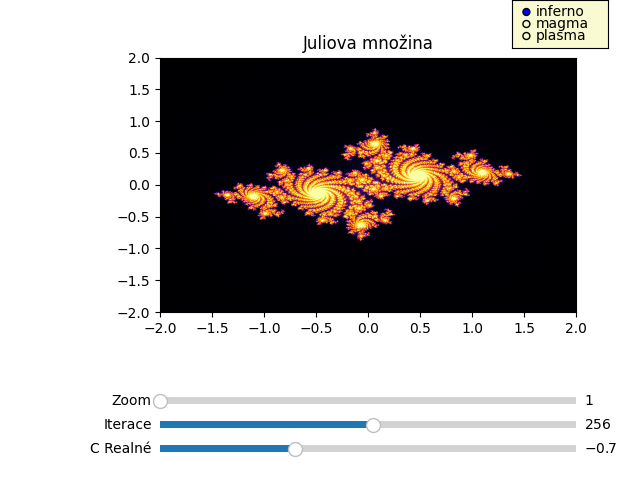

Iterace=256, Přiblížení=1, C=-0.7, Barva=magma
Iterace=256, Přiblížení=1, C=-0.7, Barva=plasma


In [135]:
def interactive_julia():
    fig, ax = plt.subplots()
    plt.subplots_adjust(left=0.25, bottom=0.35)
    axcolor = 'lightgoldenrodyellow'

    ax_iter = plt.axes([0.25, 0.10, 0.65, 0.03], facecolor=axcolor)
    ax_zoom = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)
    ax_cx_real = plt.axes([0.25, 0.05, 0.65, 0.03], facecolor=axcolor)
    ax_colormap = plt.axes([0.8, 0.9, 0.15, 0.1], facecolor=axcolor)

    s_iter = Slider(ax_iter, 'Iterace', 0, 500, valinit=max_iter, valstep=1)
    s_zoom = Slider(ax_zoom, 'Zoom', 1, 10, valinit=1, valstep=0.1)
    s_cx_real = Slider(ax_cx_real, 'C Realné', -2.0, 2.0, valinit=c_julia.real)
    r_colormap = RadioButtons(ax_colormap, ('inferno', 'magma', 'plasma'))

    def update(val):
        max_iter = int(s_iter.val)
        zoom = s_zoom.val
        c_real = s_cx_real.val
        colormap = r_colormap.value_selected
        
        xmin, xmax = -2.0 / zoom, 2.0 / zoom
        ymin, ymax = -2.0 / zoom, 2.0 / zoom
        
        c = complex(c_real, c_julia.imag)
        
        fractal_data = generate_fractal(xmin, xmax, ymin, ymax, width, height, max_iter, julia, c)
        ax.clear()
        plot_fractal(ax, fractal_data, colormap)
        ax.set_title('Juliova množina')
        print(f"Iterace={max_iter}, Přiblížení={zoom}, C={c_real}, Barva={colormap}")

    s_iter.on_changed(update)
    s_zoom.on_changed(update)
    s_cx_real.on_changed(update)
    r_colormap.on_clicked(update)

    update(None)
    plt.show()

#SPUŠTĚNÍ
interactive_julia()